<a href="https://colab.research.google.com/github/Hkhattap/-Full-Preprocessing-random-forest-classifier-Model-Example/blob/main/full%20preprocessing%20and%20random%20forest%20clsassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Full Preprocessing & random forest classifier  Model


In [1]:
# 🚀 Data Manipulation and Analysis
import pandas as pd  # DataFrame operations
import numpy as np   # Numerical computations

# 📊 Data Visualization
import matplotlib.pyplot as plt  # Plotting static graphs
import seaborn as sns            # Advanced data visualization
import plotly.express as px      # Interactive visualizations
import plotly.graph_objects as go  # Custom interactive plots

# 🧠 Machine Learning and Evaluation
from sklearn.model_selection import train_test_split  # Dataset splitting
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # Feature scaling and encoding
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier  # Robust classification model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Evaluation metrics

# ⏳ Time Handling
from datetime import datetime  # Timestamp handling

# 🛠 Utility Tools
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner outputs

# 🌟 Interactive Visualizations (Optional, install if needed)
try:
    import ipywidgets as widgets  # Interactive widgets for Jupyter notebooks
except ImportError:
    print("Optional library 'ipywidgets' not installed. Install via 'pip install ipywidgets' if required.")

# ✅ Environment setup complete
print("Libraries successfully imported. Ready to proceed!")

Libraries successfully imported. Ready to proceed!


In [2]:
#Load the dataset
from google.colab import files # Import the 'files' module from google.colab
uploaded = files.upload() # Use files.upload() to upload your file
data = pd.read_csv(next(iter(uploaded)))

Saving CloudWatch_Traffic_Web_Attack.csv to CloudWatch_Traffic_Web_Attack.csv


In [3]:
# Display basic information about the dataset
print("\n🔍 Dataset Info:")
print(data.info())


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    obj

In [4]:
# Display the first few rows for a quick preview
print("\n📋 First 5 Rows:")
print(data.head())


📋 First 5 Rows:
   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspici

In [5]:
# Display basic statistics for numerical columns
print("\n📊 Dataset Statistics:")
print(data.describe(include='all'))


📊 Dataset Statistics:
            bytes_in     bytes_out         creation_time  \
count   2.820000e+02  2.820000e+02                   282   
unique           NaN           NaN                    30   
top              NaN           NaN  2024-04-26T09:00:00Z   
freq             NaN           NaN                    17   
mean    1.199390e+06  8.455429e+04                   NaN   
std     4.149312e+06  2.549279e+05                   NaN   
min     4.000000e+01  4.400000e+01                   NaN   
25%     5.381500e+03  1.114200e+04                   NaN   
50%     1.318200e+04  1.379950e+04                   NaN   
75%     3.083300e+04  2.627950e+04                   NaN   
max     2.520779e+07  1.561220e+06                   NaN   

                    end_time         src_ip src_ip_country_code protocol  \
count                    282            282                 282      282   
unique                    30             28                   7        1   
top     2024-04-26T09:10:00Z

In [6]:
# ===============================
# 🔍 Checking for Missing Data
# ===============================

# Display the count of missing values for each column
missing_data = data.isnull().sum()
print("\n🔍 Missing Data Summary:")
print(missing_data[missing_data > 0])  # Display only columns with missing values


🔍 Missing Data Summary:
Series([], dtype: int64)


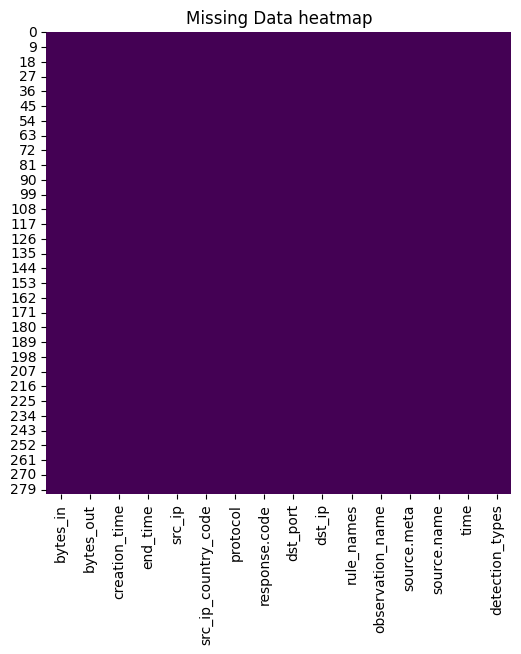

In [7]:
# Visualizing missing data (optional for better insight)
plt.figure(figsize=(6, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data heatmap')
plt.show()

In [8]:
# Handling missing values (example: drop rows or fill missing data)
# Uncomment one of the following lines based on the project requirements
# data = data.dropna()  # Drop rows with missing values
# data.fillna(method='ffill', inplace=True)  # Fill missing values with forward fill

In [9]:
# ===============================
# ⚖️ Homogeneity Testing
# ===============================

# Importing necessary libraries for statistical tests
from scipy.stats import levene

In [10]:
# Selecting numerical columns for homogeneity testing
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [11]:
# Performing Levene's test for homogeneity
print("\n⚖️ Homogeneity Test Results:")
for column in numerical_columns:
    stat, p_value = levene(data[column].dropna(), data[numerical_columns[0]].dropna())
    print(f"Column: {column} | Statistic: {stat:.3f} | P-value: {p_value:.3f}")

    if p_value < 0.05:
        print(f"❌ {column} does not have homogeneous variance.")
    else:
        print(f"✅ {column} passes the homogeneity test.")


⚖️ Homogeneity Test Results:
Column: bytes_in | Statistic: 0.000 | P-value: 1.000
✅ bytes_in passes the homogeneity test.
Column: bytes_out | Statistic: 20.409 | P-value: 0.000
❌ bytes_out does not have homogeneous variance.
Column: response.code | Statistic: 23.353 | P-value: 0.000
❌ response.code does not have homogeneous variance.
Column: dst_port | Statistic: 23.353 | P-value: 0.000
❌ dst_port does not have homogeneous variance.


In [12]:

# Proceed with data normalization or feature engineering based on test results.
print("\n✅ Missing data handling and homogeneity testing completed!")


✅ Missing data handling and homogeneity testing completed!


In [13]:
# ⚖️ Normalizing Features

# Columns with non-homogeneous variance
columns_to_normalize = ['bytes_out', 'response.code', 'dst_port']

In [14]:
# Applying log transformation to stabilize variance
for col in columns_to_normalize:
    data[col] = np.log1p(data[col])  # log1p handles log(0) safely

In [15]:
# 🔧 Scaling Features

# Importing MinMaxScaler for scaling
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Initialize scaler
scaler = MinMaxScaler()

In [17]:
# Selecting numerical columns for scaling
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [18]:
# Scaling the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [19]:
# ✅ Verification
# Display the first few rows of the normalized and scaled dataset
print("\n📋 Transformed Dataset (First 5 Rows):")
print(data.head())


📋 Transformed Dataset (First 5 Rows):
   bytes_in  bytes_out         creation_time              end_time  \
0  0.000221   0.541915  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1  0.001225   0.574098  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2  0.001129   0.545371  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3  0.001210   0.550957  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4  0.000257   0.548336  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            0.0       0.0   
1     165.225.33.6                  US    HTTPS            0.0       0.0   
2  165.225.212.255                  CA    HTTPS            0.0       0.0   
3   136.226.64.114                  US    HTTPS            0.0       0.0   
4   165.225.240.79                  NL    HTTPS            0.0       0.0   

         dst_ip              rule_names                      observation_name  \
0 

In [20]:
# Check if the scaling was successful
print("\n📊 Summary Statistics After Scaling:")
print(data[numerical_columns].describe())


📊 Summary Statistics After Scaling:
         bytes_in   bytes_out  response.code  dst_port
count  282.000000  282.000000          282.0     282.0
mean     0.047579    0.571752            0.0       0.0
std      0.164605    0.141656            0.0       0.0
min      0.000000    0.000000            0.0       0.0
25%      0.000212    0.527237            0.0       0.0
50%      0.000521    0.547695            0.0       0.0
75%      0.001222    0.609310            0.0       0.0
max      1.000000    1.000000            0.0       0.0


In [21]:
# 📌 Next Step
# Proceed to feature engineering or model training.
print("\n✅ Features normalized and scaled successfully!")


✅ Features normalized and scaled successfully!


In [22]:
# 🔍 Dataset Overview
# Summary statistics for all columns
print("\n📊 Complete Summary Statistics:")
print(data.describe(include='all'))


📊 Complete Summary Statistics:
          bytes_in   bytes_out         creation_time              end_time  \
count   282.000000  282.000000                   282                   282   
unique         NaN         NaN                    30                    30   
top            NaN         NaN  2024-04-26T09:00:00Z  2024-04-26T09:10:00Z   
freq           NaN         NaN                    17                    17   
mean      0.047579    0.571752                   NaN                   NaN   
std       0.164605    0.141656                   NaN                   NaN   
min       0.000000    0.000000                   NaN                   NaN   
25%       0.000212    0.527237                   NaN                   NaN   
50%       0.000521    0.547695                   NaN                   NaN   
75%       0.001222    0.609310                   NaN                   NaN   
max       1.000000    1.000000                   NaN                   NaN   

               src_ip src_ip_co

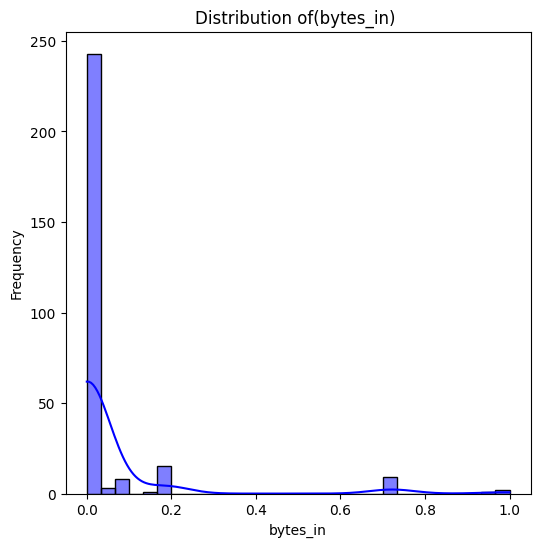

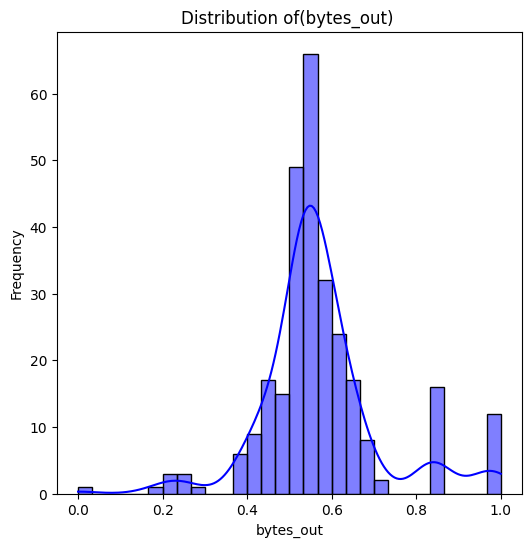

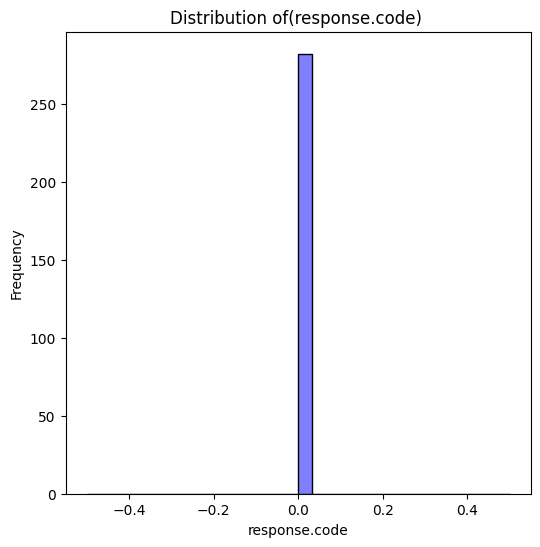

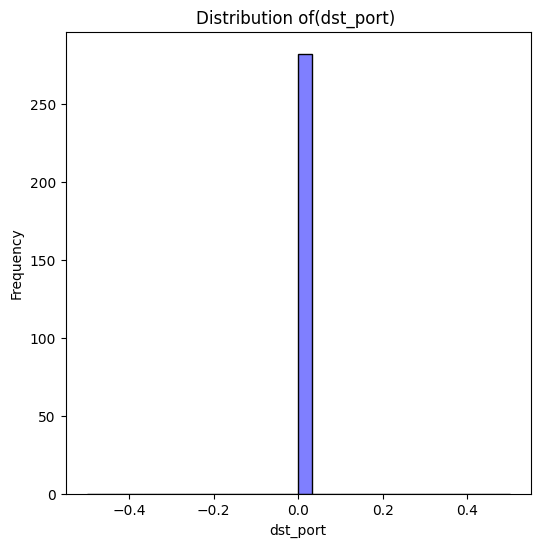

In [23]:
# Visualizing distributions for numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of({col}) ')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

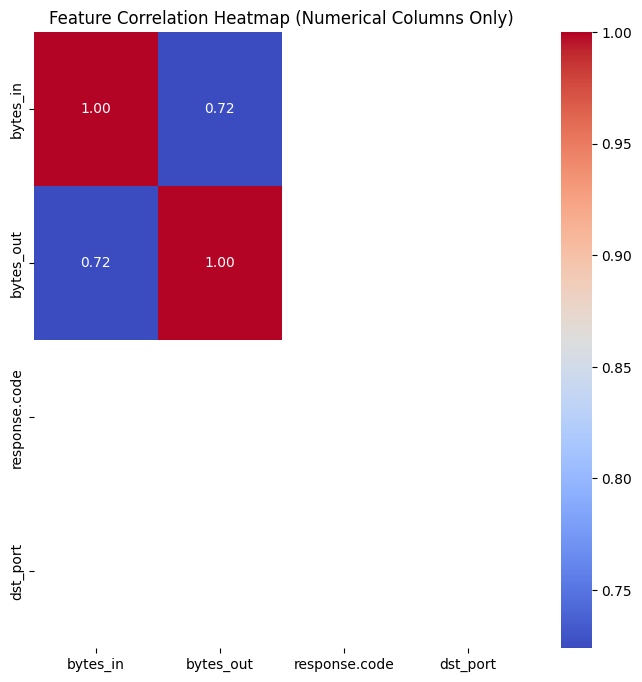

In [24]:
# 📈 Feature Correlation Analysis (Fixed)

# Selecting only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Numerical Columns Only)')
plt.show()


🗂 Unique Values in creation_time:
creation_time
2024-04-26T09:00:00Z    17
2024-04-26T08:50:00Z    13
2024-04-26T09:40:00Z    11
2024-04-26T09:50:00Z    11
2024-04-25T23:10:00Z    11
2024-04-25T23:20:00Z    11
2024-04-25T23:00:00Z    10
2024-04-26T08:20:00Z    10
2024-04-26T01:30:00Z    10
2024-04-26T01:20:00Z    10
2024-04-26T00:40:00Z    10
2024-04-26T01:00:00Z    10
2024-04-26T00:10:00Z    10
2024-04-26T01:10:00Z     9
2024-04-26T09:30:00Z     9
2024-04-26T09:10:00Z     9
2024-04-25T23:50:00Z     9
2024-04-26T01:40:00Z     9
2024-04-26T00:30:00Z     9
2024-04-25T23:40:00Z     9
2024-04-26T00:00:00Z     8
2024-04-25T23:30:00Z     8
2024-04-26T09:20:00Z     8
2024-04-26T00:20:00Z     8
2024-04-26T08:30:00Z     8
2024-04-26T01:50:00Z     8
2024-04-26T08:00:00Z     7
2024-04-26T08:10:00Z     7
2024-04-26T08:40:00Z     7
2024-04-26T00:50:00Z     6
Name: count, dtype: int64


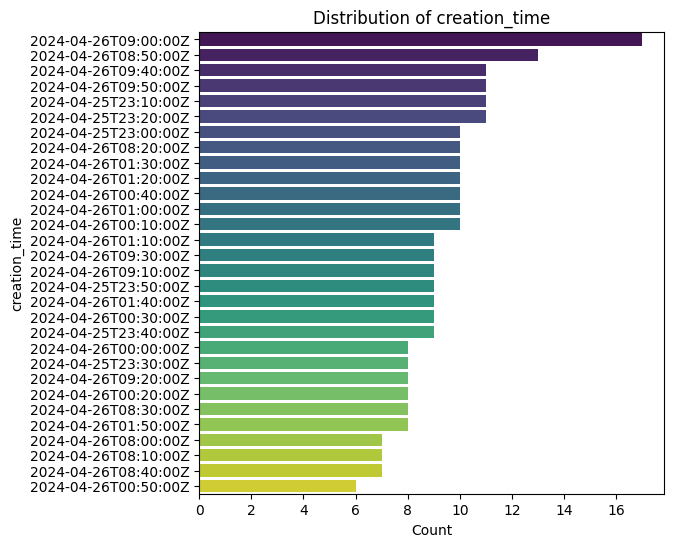


🗂 Unique Values in end_time:
end_time
2024-04-26T09:10:00Z    17
2024-04-26T09:00:00Z    13
2024-04-26T09:50:00Z    11
2024-04-26T10:00:00Z    11
2024-04-25T23:20:00Z    11
2024-04-25T23:30:00Z    11
2024-04-25T23:10:00Z    10
2024-04-26T08:30:00Z    10
2024-04-26T01:40:00Z    10
2024-04-26T01:30:00Z    10
2024-04-26T00:50:00Z    10
2024-04-26T01:10:00Z    10
2024-04-26T00:20:00Z    10
2024-04-26T01:20:00Z     9
2024-04-26T09:40:00Z     9
2024-04-26T09:20:00Z     9
2024-04-26T00:00:00Z     9
2024-04-26T01:50:00Z     9
2024-04-26T00:40:00Z     9
2024-04-25T23:50:00Z     9
2024-04-26T00:10:00Z     8
2024-04-25T23:40:00Z     8
2024-04-26T09:30:00Z     8
2024-04-26T00:30:00Z     8
2024-04-26T08:40:00Z     8
2024-04-26T02:00:00Z     8
2024-04-26T08:10:00Z     7
2024-04-26T08:20:00Z     7
2024-04-26T08:50:00Z     7
2024-04-26T01:00:00Z     6
Name: count, dtype: int64


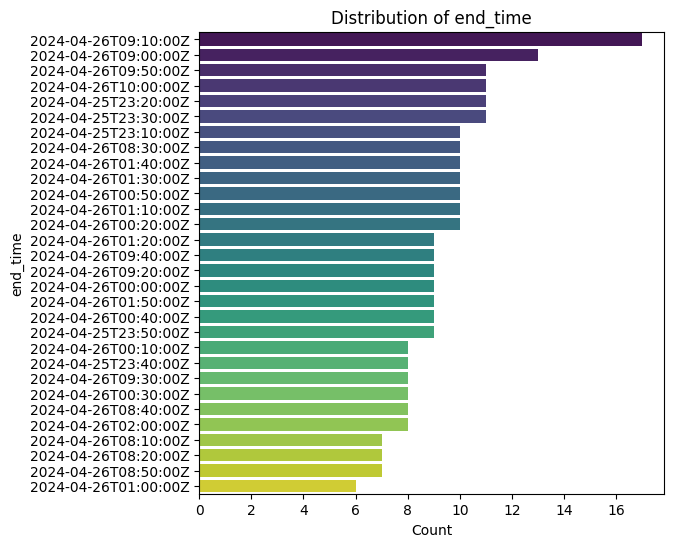


🗂 Unique Values in src_ip:
src_ip
165.225.209.4      29
165.225.26.101     28
155.91.45.242      28
136.226.67.101     28
147.161.131.1      21
165.225.240.79     18
136.226.77.103     17
147.161.161.82     16
165.225.212.255    15
94.188.248.74      14
136.226.64.114     13
165.225.33.6       12
165.225.213.7      11
136.226.80.97      11
165.225.8.79        6
192.241.230.19      2
65.49.1.69          2
198.235.24.81       1
65.49.1.72          1
65.49.1.94          1
65.49.1.104         1
65.49.1.97          1
65.49.1.99          1
65.49.1.76          1
65.49.1.96          1
65.49.1.95          1
65.49.1.74          1
192.241.205.18      1
Name: count, dtype: int64


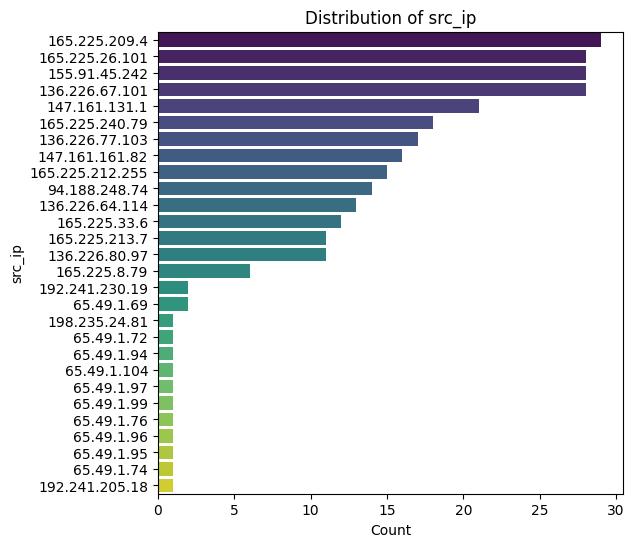


🗂 Unique Values in src_ip_country_code:
src_ip_country_code
US    113
CA     72
DE     28
AT     21
NL     18
AE     16
IL     14
Name: count, dtype: int64


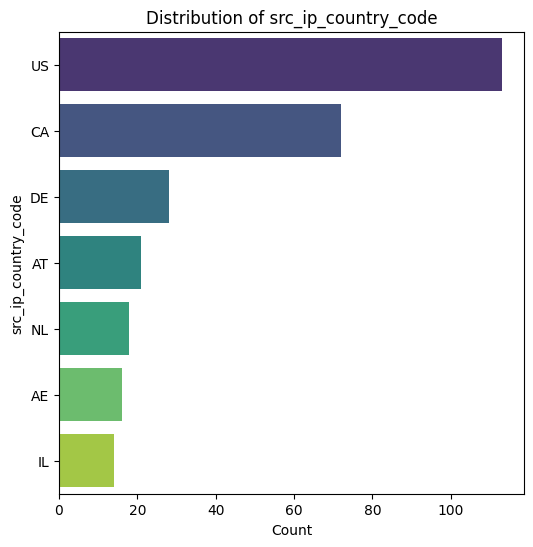


🗂 Unique Values in protocol:
protocol
HTTPS    282
Name: count, dtype: int64


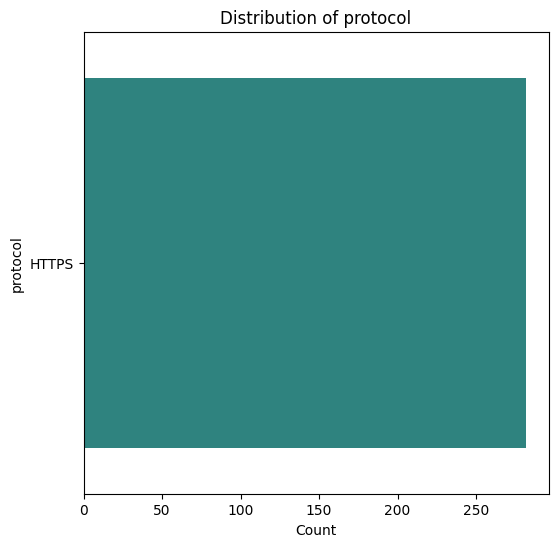


🗂 Unique Values in dst_ip:
dst_ip
10.138.69.97    282
Name: count, dtype: int64


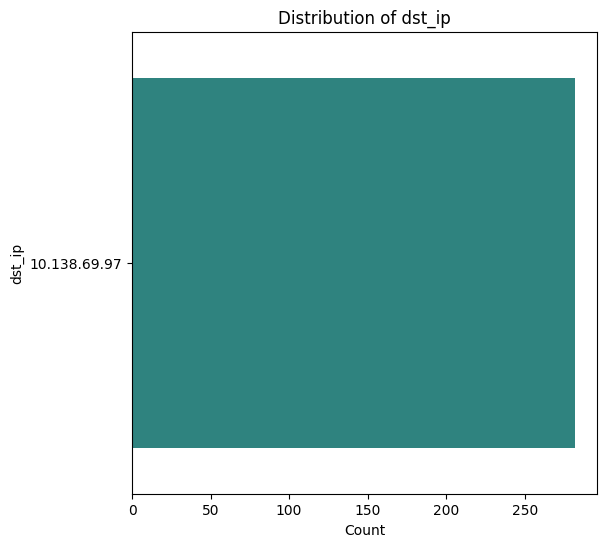


🗂 Unique Values in rule_names:
rule_names
Suspicious Web Traffic    282
Name: count, dtype: int64


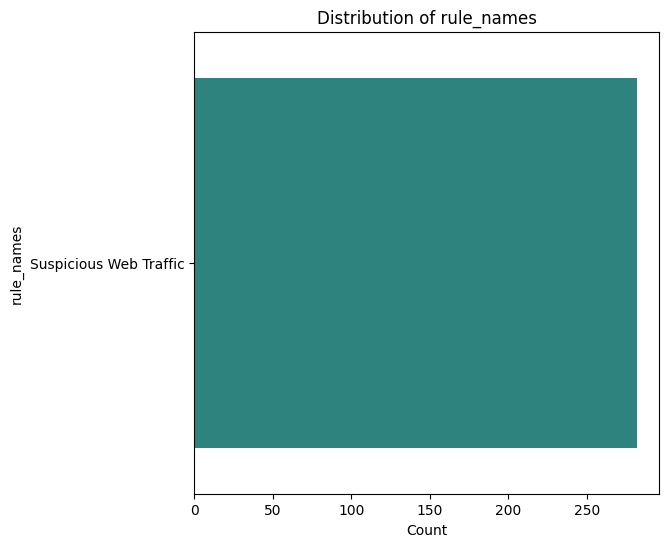


🗂 Unique Values in observation_name:
observation_name
Adversary Infrastructure Interaction    282
Name: count, dtype: int64


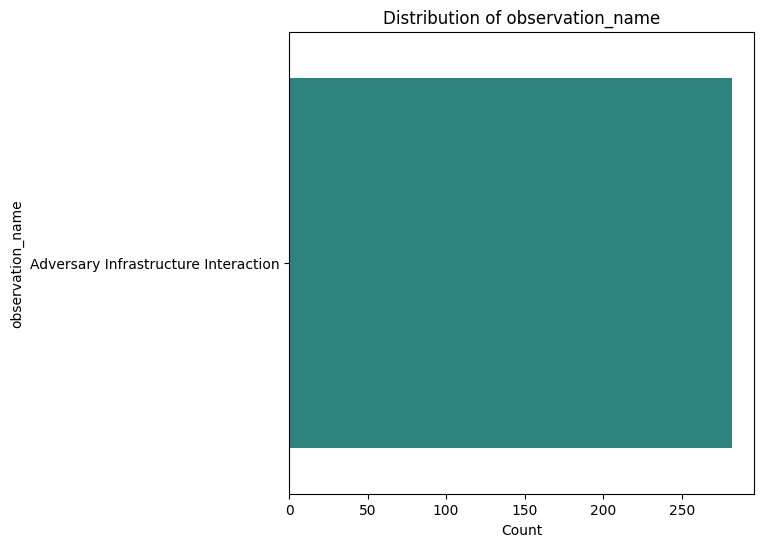


🗂 Unique Values in source.meta:
source.meta
AWS_VPC_Flow    282
Name: count, dtype: int64


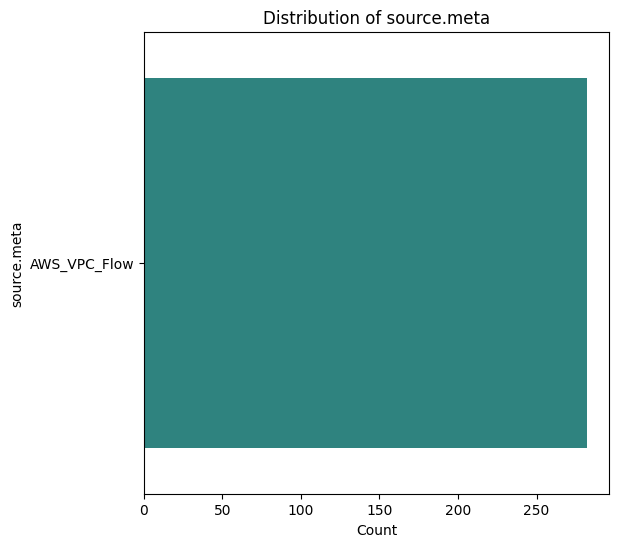


🗂 Unique Values in source.name:
source.name
prod_webserver    282
Name: count, dtype: int64


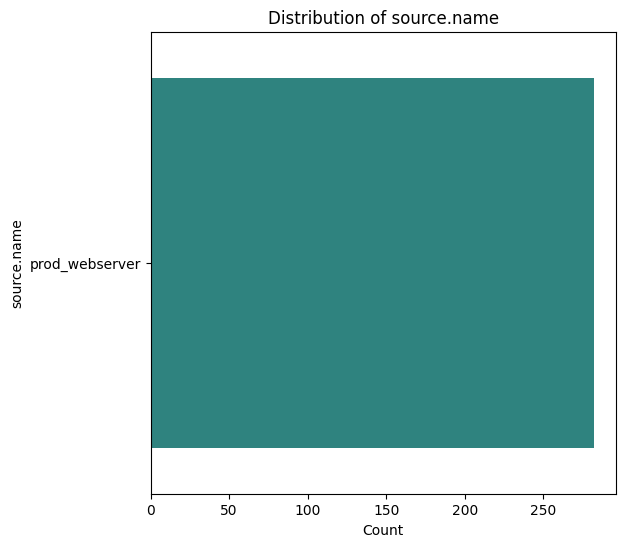


🗂 Unique Values in time:
time
2024-04-26T09:00:00Z    17
2024-04-26T08:50:00Z    13
2024-04-26T09:40:00Z    11
2024-04-26T09:50:00Z    11
2024-04-25T23:10:00Z    11
2024-04-25T23:20:00Z    11
2024-04-25T23:00:00Z    10
2024-04-26T08:20:00Z    10
2024-04-26T01:30:00Z    10
2024-04-26T01:20:00Z    10
2024-04-26T00:40:00Z    10
2024-04-26T01:00:00Z    10
2024-04-26T00:10:00Z    10
2024-04-26T01:10:00Z     9
2024-04-26T09:30:00Z     9
2024-04-26T09:10:00Z     9
2024-04-25T23:50:00Z     9
2024-04-26T01:40:00Z     9
2024-04-26T00:30:00Z     9
2024-04-25T23:40:00Z     9
2024-04-26T00:00:00Z     8
2024-04-25T23:30:00Z     8
2024-04-26T09:20:00Z     8
2024-04-26T00:20:00Z     8
2024-04-26T08:30:00Z     8
2024-04-26T01:50:00Z     8
2024-04-26T08:00:00Z     7
2024-04-26T08:10:00Z     7
2024-04-26T08:40:00Z     7
2024-04-26T00:50:00Z     6
Name: count, dtype: int64


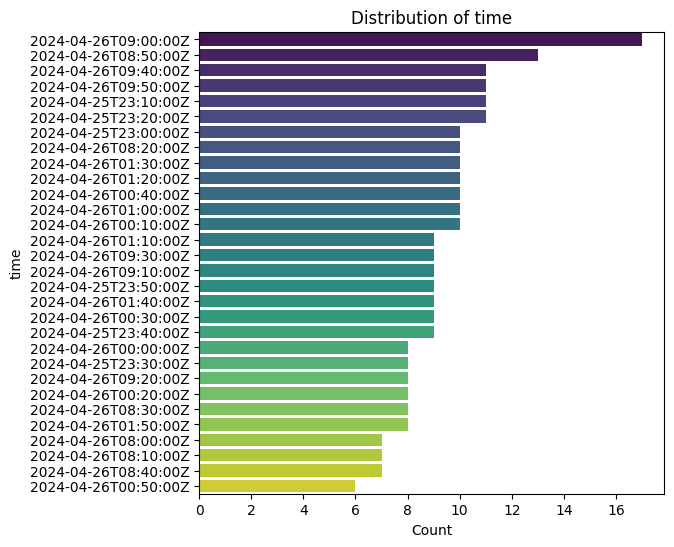


🗂 Unique Values in detection_types:
detection_types
waf_rule    282
Name: count, dtype: int64


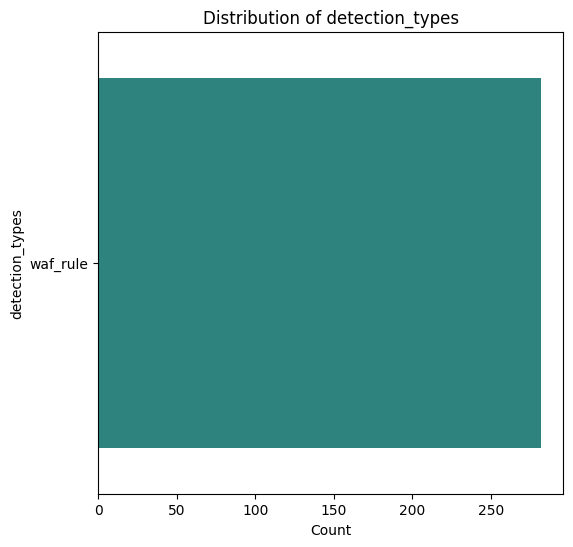

In [25]:
# 🔗 Advanced Categorical Insights

categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n🗂 Unique Values in {col}:")
    print(data[col].value_counts())

    plt.figure(figsize=(6, 6))
    sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


⚠️ Outliers detected in bytes_in: 12


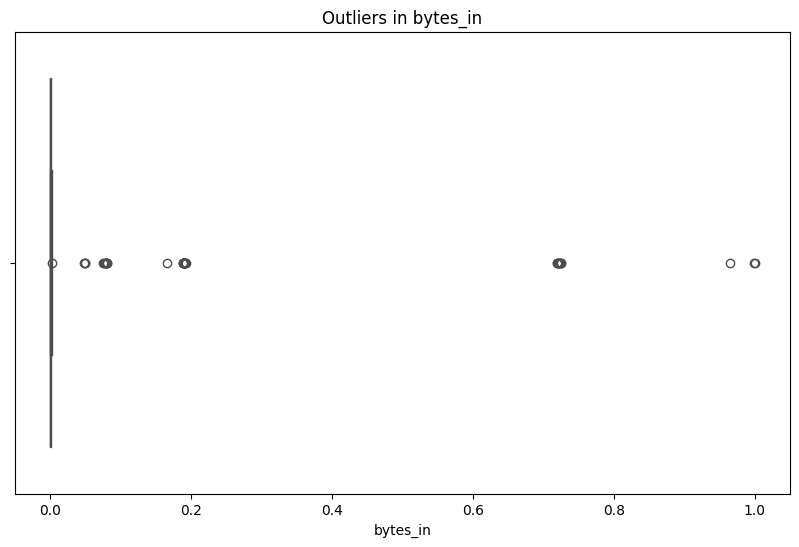


⚠️ Outliers detected in bytes_out: 4


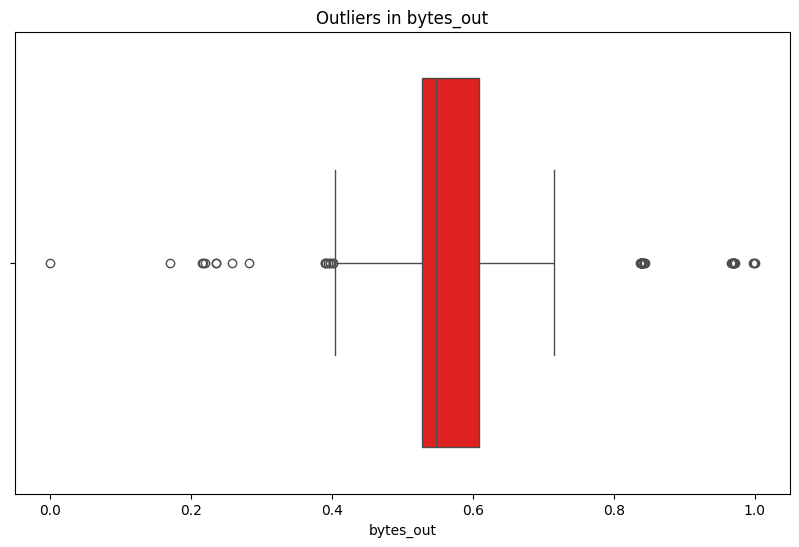


⚠️ Outliers detected in response.code: 0


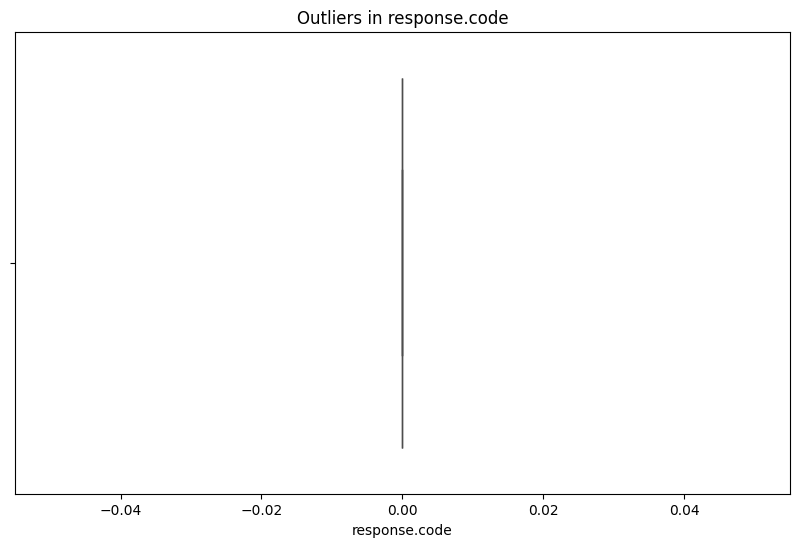


⚠️ Outliers detected in dst_port: 0


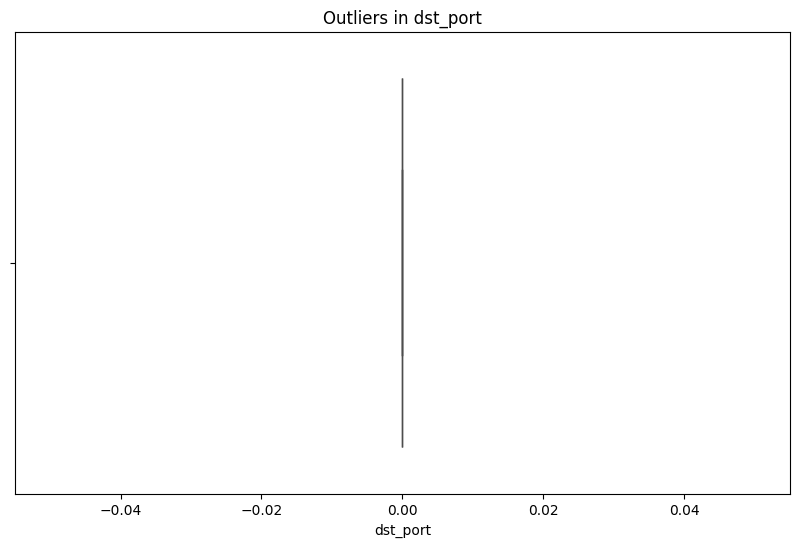

In [26]:
# ⚠️ Advanced Anomaly Detection

# Using Z-score for outlier detection
from scipy.stats import zscore

for col in numerical_columns:
    z_scores = zscore(data[col])
    outliers = data[np.abs(z_scores) > 3]
    print(f"\n⚠️ Outliers detected in {col}: {len(outliers)}")

    # Visualizing outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=col, color="red")
    plt.title(f'Outliers in {col}')
    plt.show()


⚠️ Outliers in bytes_in: 40


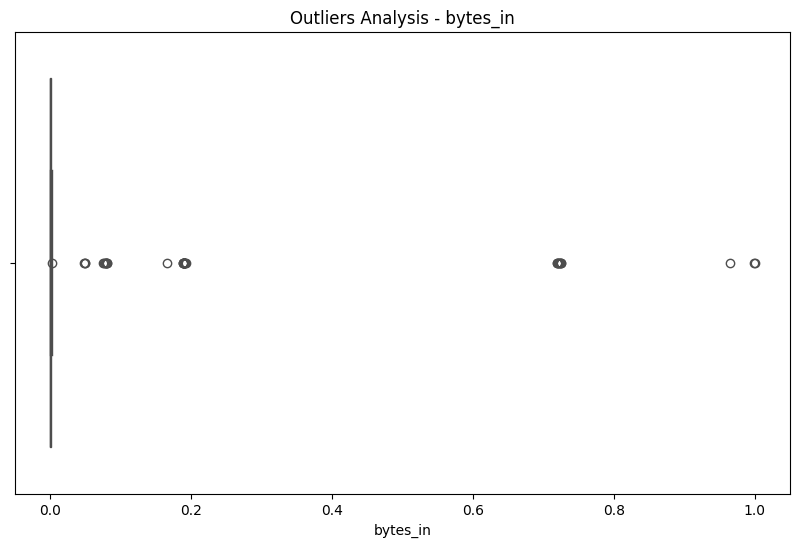


⚠️ Outliers in bytes_out: 45


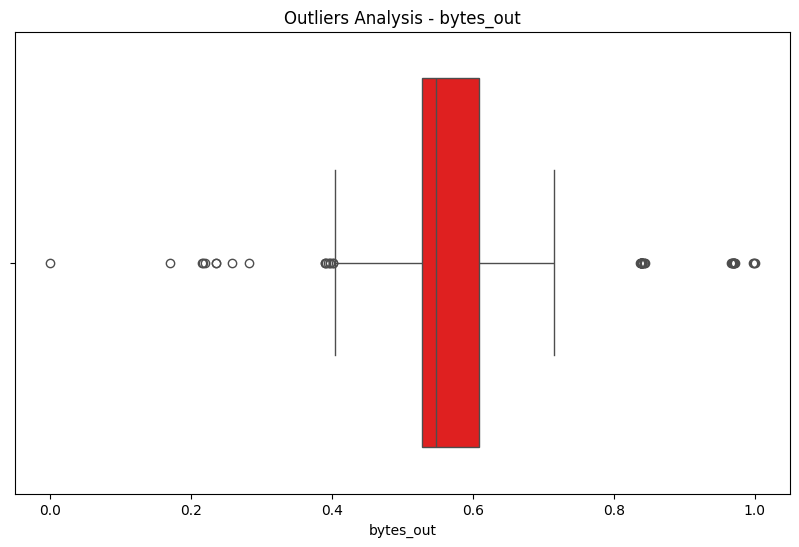


⚠️ Outliers in response.code: 0


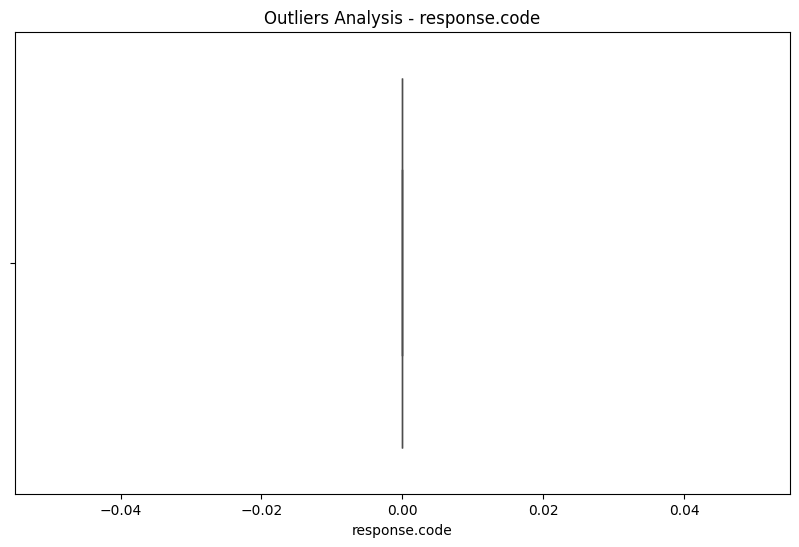


⚠️ Outliers in dst_port: 0


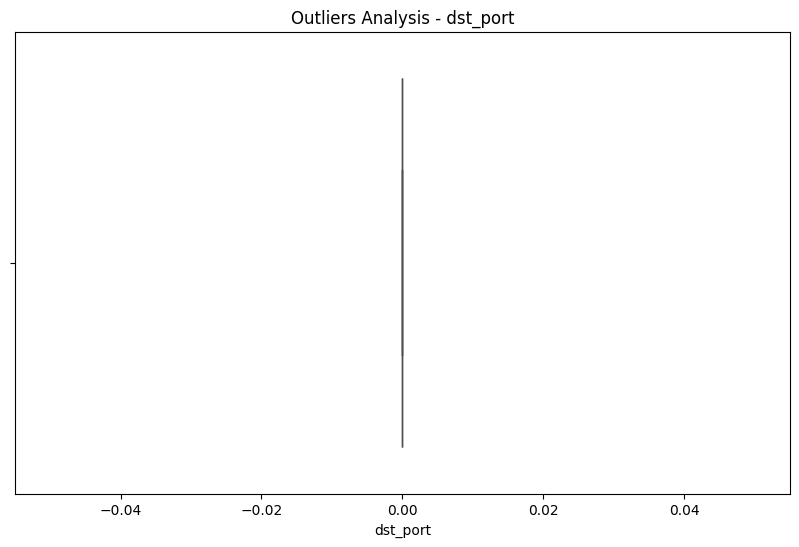

In [27]:

# ⚠️ Advanced Outlier Detection

# Using IQR method for detailed outlier analysis
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    print(f"\n⚠️ Outliers in {col}: {len(outliers)}")

    # Boxplot for visualizing outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=col, color='red')
    plt.title(f'Outliers Analysis - {col}')
    plt.show()

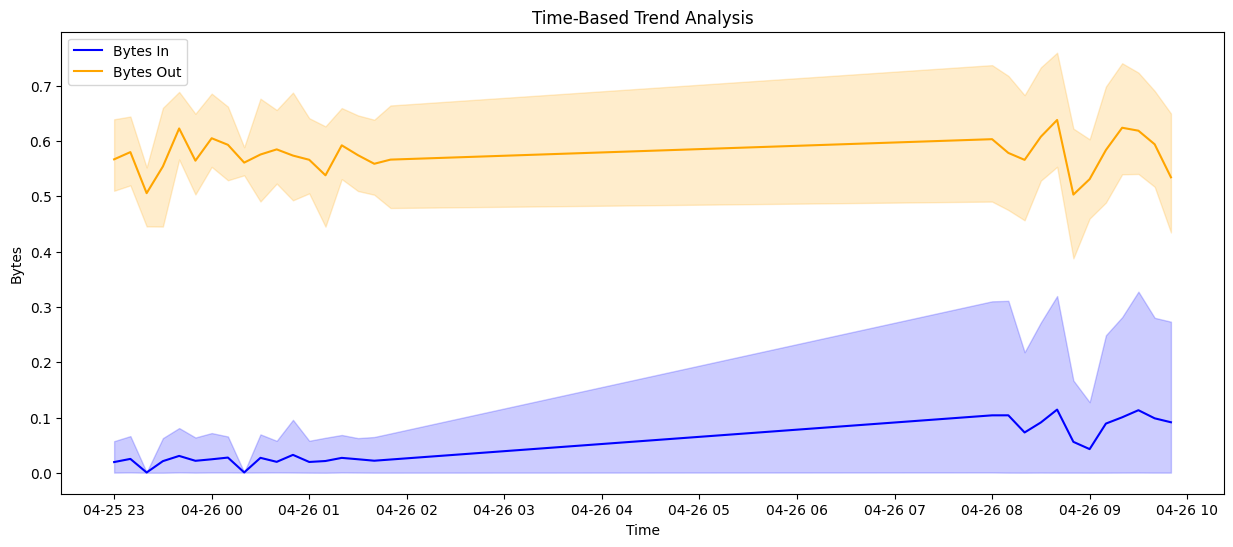

In [28]:
# 📅 Time-Based Trend Analysis

if 'time' in data.columns:
    data['time'] = pd.to_datetime(data['time'])

    plt.figure(figsize=(15, 6))
    sns.lineplot(data=data, x='time', y='bytes_in', label='Bytes In', color='blue')
    sns.lineplot(data=data, x='time', y='bytes_out', label='Bytes Out', color='orange')
    plt.title('Time-Based Trend Analysis')
    plt.xlabel('Time')
    plt.ylabel('Bytes')
    plt.legend()
    plt.show()

In [29]:
# ===============================
# ⭐ Feature Importance (Statistical)
# ===============================

# Using correlation to identify top features
top_features = correlation_matrix.abs().mean().sort_values(ascending=False).index[:5]
print("\n⭐ Top Features Based on Correlation:")
print(top_features)


⭐ Top Features Based on Correlation:
Index(['bytes_in', 'bytes_out', 'response.code', 'dst_port'], dtype='object')


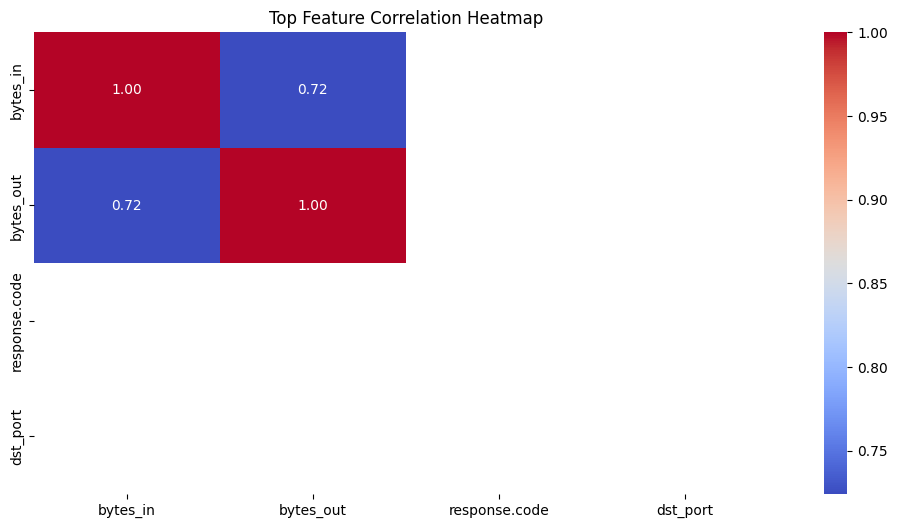

In [30]:
# Visualizing the most important features
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Feature Correlation Heatmap')
plt.show()

In [31]:
# ===============================
# 🛠 Feature Creation
# ===============================

# Example: Creating a traffic intensity feature
data['traffic_intensity'] = data['bytes_in'] + data['bytes_out']
print("✅ New feature 'traffic_intensity' created.")

# Example: Creating a duration feature if time columns exist
if 'creation_time' in data.columns and 'end_time' in data.columns:
    data['creation_time'] = pd.to_datetime(data['creation_time'])
    data['end_time'] = pd.to_datetime(data['end_time'])
    data['connection_duration'] = (data['end_time'] - data['creation_time']).dt.total_seconds()
    print("✅ New feature 'connection_duration' created.")

✅ New feature 'traffic_intensity' created.
✅ New feature 'connection_duration' created.


In [32]:
# ===============================
# 🔧 Feature Transformation
# ===============================

# Applying log transformation to skewed features
skewed_features = ['traffic_intensity', 'bytes_in', 'bytes_out']
for col in skewed_features:
    data[f'{col}_log'] = np.log1p(data[col])
    print(f"✅ Log-transformed feature '{col}_log' created.")

✅ Log-transformed feature 'traffic_intensity_log' created.
✅ Log-transformed feature 'bytes_in_log' created.
✅ Log-transformed feature 'bytes_out_log' created.


In [33]:
# ===============================
# 🔗 Feature Encoding
# ===============================

# Encoding categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[f'{col}_encoded'] = LabelEncoder().fit_transform(data[col])
    print(f"✅ Categorical feature '{col}' encoded.")

✅ Categorical feature 'src_ip' encoded.
✅ Categorical feature 'src_ip_country_code' encoded.
✅ Categorical feature 'protocol' encoded.
✅ Categorical feature 'dst_ip' encoded.
✅ Categorical feature 'rule_names' encoded.
✅ Categorical feature 'observation_name' encoded.
✅ Categorical feature 'source.meta' encoded.
✅ Categorical feature 'source.name' encoded.
✅ Categorical feature 'detection_types' encoded.


In [34]:

# ===============================
# ⭐ Feature Selection (Fixed)
# ===============================

# Identifying features with low variance
from sklearn.feature_selection import VarianceThreshold

# Selecting numerical columns for variance thresholding
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Identifying features with low variance
low_variance_filter = VarianceThreshold(threshold=0.01)
low_variance_filter.fit(numerical_data)

# Mapping low variance features to their original dataset columns
low_variance_features = numerical_data.columns[~low_variance_filter.get_support()]
print(f"\n⚠️ Low variance features detected and removed: {list(low_variance_features)}")

# Dropping low variance features from the original dataset
data.drop(columns=low_variance_features, inplace=True, errors='ignore')


⚠️ Low variance features detected and removed: ['response.code', 'dst_port', 'connection_duration', 'bytes_out_log', 'protocol_encoded', 'dst_ip_encoded', 'rule_names_encoded', 'observation_name_encoded', 'source.meta_encoded', 'source.name_encoded', 'detection_types_encoded']


In [35]:
# Removing redundant features (e.g., original features replaced by transformed ones)
redundant_features = ['bytes_in', 'bytes_out', 'traffic_intensity']
data.drop(columns=redundant_features, inplace=True, errors='ignore')
print("✅ Redundant features removed.")

✅ Redundant features removed.


In [36]:
# ===============================
# 📋 Final Dataset Summary
# ===============================

print("\n📋 Final Dataset Features:")
print(data.columns)

print("\n🔢 Final Dataset Shape:", data.shape)


📋 Final Dataset Features:
Index(['creation_time', 'end_time', 'src_ip', 'src_ip_country_code',
       'protocol', 'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types', 'traffic_intensity_log',
       'bytes_in_log', 'src_ip_encoded', 'src_ip_country_code_encoded'],
      dtype='object')

🔢 Final Dataset Shape: (282, 16)


In [37]:
# ===============================
# 🔧 Verification
# ===============================

print("\n📋 Final Dataset After Removing Low Variance Features:")
print(data.info())


📋 Final Dataset After Removing Low Variance Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   creation_time                282 non-null    datetime64[ns, UTC]
 1   end_time                     282 non-null    datetime64[ns, UTC]
 2   src_ip                       282 non-null    object             
 3   src_ip_country_code          282 non-null    object             
 4   protocol                     282 non-null    object             
 5   dst_ip                       282 non-null    object             
 6   rule_names                   282 non-null    object             
 7   observation_name             282 non-null    object             
 8   source.meta                  282 non-null    object             
 9   source.name                  282 non-null    object             


In [38]:
# ===============================
# 🔧 Verification
# ===============================

print("\n📋 Final Dataset After Removing Low Variance Features:")
print(data.info())

# Define the target column
target_column = 'detection_types'  # Ensure this column exists in your dataset
if target_column not in data.columns:
    raise ValueError(f"❌ Target column '{target_column}' not found in the dataset.")


📋 Final Dataset After Removing Low Variance Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   creation_time                282 non-null    datetime64[ns, UTC]
 1   end_time                     282 non-null    datetime64[ns, UTC]
 2   src_ip                       282 non-null    object             
 3   src_ip_country_code          282 non-null    object             
 4   protocol                     282 non-null    object             
 5   dst_ip                       282 non-null    object             
 6   rule_names                   282 non-null    object             
 7   observation_name             282 non-null    object             
 8   source.meta                  282 non-null    object             
 9   source.name                  282 non-null    object             


In [39]:
# Identify numerical and categorical columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔢 Numerical Features: {numerical_features}")
print(f"🗂️ Categorical Features: {categorical_features}")


🔢 Numerical Features: ['traffic_intensity_log', 'bytes_in_log', 'src_ip_encoded', 'src_ip_country_code_encoded']
🗂️ Categorical Features: ['src_ip', 'src_ip_country_code', 'protocol', 'dst_ip', 'rule_names', 'observation_name', 'source.meta', 'source.name', 'detection_types']


In [40]:
# ===============================
# 📂 Step 2: Splitting the Dataset
# ===============================
# Splitting features and target
X = data.drop(columns=[target_column], errors='ignore')  # Features
y = data[target_column]  # Target variable

In [41]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n📊 Dataset Split Completed:\n - Training set: {X_train.shape}\n - Testing set: {X_test.shape}")


📊 Dataset Split Completed:
 - Training set: (225, 15)
 - Testing set: (57, 15)


In [42]:
# ===============================
# 📊 Step 3: Preprocessing Pipelines
# ===============================
# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standard scaling for numerical features
])

In [43]:
# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical features
])

In [44]:
# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [col for col in numerical_features if col in X.columns]),
        ('cat', categorical_transformer, [col for col in categorical_features if col in X.columns])
    ])

In [45]:
# 🧠 Step 4: Defining the Model Pipeline
# Model pipeline with preprocessing and classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [46]:
# 🚀 Step 5: Model Training
print("\n🚀 Training Advanced Model Pipeline...")
model_pipeline.fit(X_train, y_train)


🚀 Training Advanced Model Pipeline...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['traffic_intensity_log',
                                                   'bytes_in_log',
                                                   'src_ip_encoded',
                                                   'src_ip_country_code_encoded']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['src_ip',
                                                   'src_ip_country_code',
                                                   'protocol', 'dst_ip',
                                                   'rule_names',
                                                   'observation_name',
                                                   'source.meta',
                                                   'source.name'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [47]:
# Test set predictions
y_pred = model_pipeline.predict(X_test)

In [48]:
# ===============================
# 📊 Step 6: Model Evaluation
# ===============================
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")


📋 Classification Report:
              precision    recall  f1-score   support

    waf_rule       1.00      1.00      1.00        57

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

✅ Model Accuracy: 1.00
